<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/3_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-03-1-minimizing_cost_show_graph.py

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

In [ ]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = tf.model.fit(x_train, y_train, epochs=100)

y_predict = tf.model.predict(np.array([5,4]))
print(y_predict)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4.5213
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 3.2131
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 2.3049
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 1.6743
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2363
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.9319
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 0.7202
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.5729
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4703
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3986
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3485
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3133
Epoch 13/100
1/1 [==============================] -

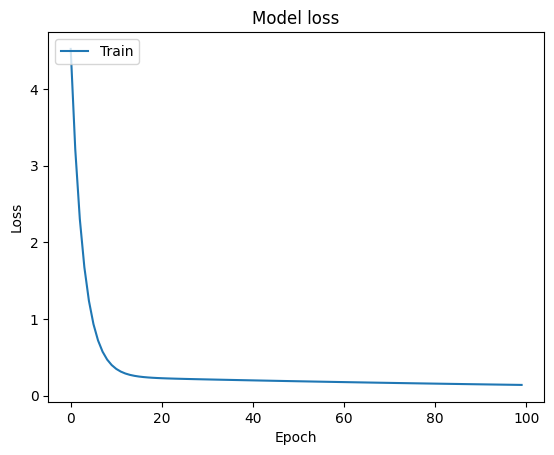

In [ ]:
# 반복학습에 따른 오차값 시각화
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 직접구현

https://sjkoding.tistory.com/67

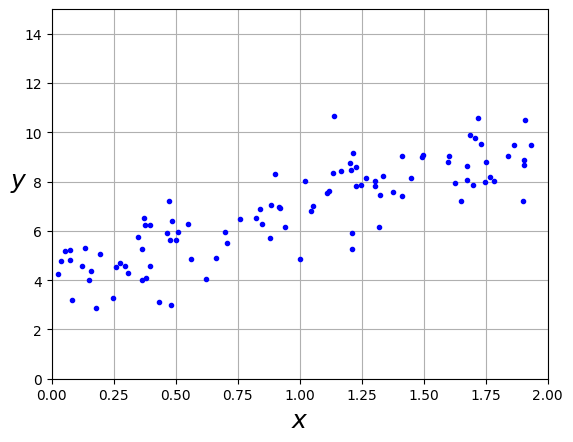

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 랜덤 데이터 생성
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.grid()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [ ]:
# 임의의 가중치 W와 편향값 b
W = np.random.randn(1)
b = np.random.randn(1)
print(W, b)

[1.84935654] [-0.2039743]


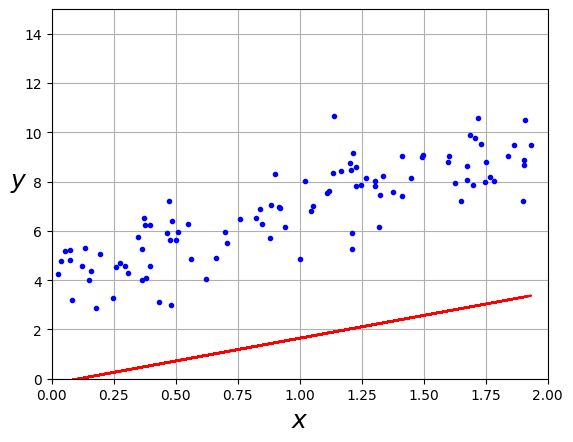

In [ ]:
# 위의 임의의 값인 W,b를 통해 그린 그래프
y_pred = W * X + b
plt.plot(X,y_pred,'r-')
plt.plot(X,y,'b.')
plt.grid()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [ ]:
# MSE 함수
def MSE(y, y_pred):
    m = len(y)
    cost = (1/m) * np.sum(np.square(y_pred-y)) # 오차값을 제곱하여 평균

    return cost

print(MSE(y, y_pred))

28.56434881702618


In [ ]:
# 경사하강법

y_preds = []
epochs = 1000
epsilon = 0.03
learning_rate = 0.001

for epoch in range(epochs):
    # 예측값 계산
    y_pred = W * X + b #예측값
    y_preds.append(y_pred)

    # MSE 계산
    mse = np.mean((y_pred - y)**2)

    # mse(오차제곱의평균)값이 epsilon값보다 작다면 반복검사를 멈춤
    if mse < epsilon:
        print("Reached MSE below 0.03")
        break

    # w와 b 업데이트
    w_gradient = (2/len(X)) * np.dot(X.T, (y_pred - y)).sum() # w미분 = w경사
    b_gradient = (2/len(X)) * np.sum(y_pred - y) # b미분 = b경사
    W -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, MSE: {mse:.4f}')

print(f'Final Parameters: w={W[0]:.4f}, b={b[0]:.4f}')

Epoch: 0, MSE: 6.8665
Epoch: 100, MSE: 4.0293
Epoch: 200, MSE: 2.7818
Epoch: 300, MSE: 2.2180
Epoch: 400, MSE: 1.9493
Epoch: 500, MSE: 1.8089
Epoch: 600, MSE: 1.7250
Epoch: 700, MSE: 1.6669
Epoch: 800, MSE: 1.6212
Epoch: 900, MSE: 1.5821
Final Parameters: w=3.9540, b=2.7338


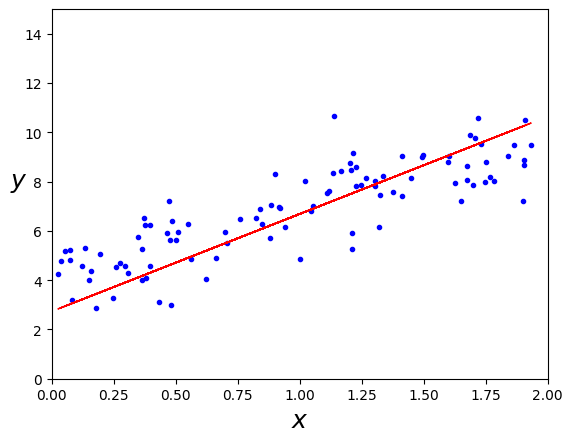

In [ ]:
# 결과값을 통한 시각화
plt.figure()
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-', linewidth=1)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

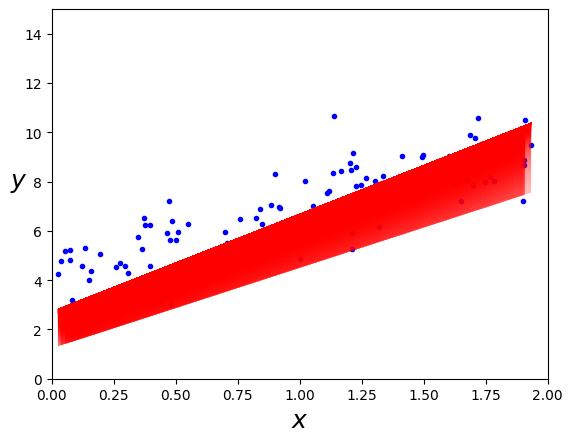

In [ ]:
# 각 변화값에 대한 시각화
plt.figure()
plt.plot(X, y, 'b.')
for index, y_pred in enumerate(y_preds):
    plt.plot(X, y_pred, 'r-', alpha = 0.3 + (0.7/len(y_preds))*index, linewidth=0.1)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

화살표의 길이가 짧을 수록 미분값이 0에 가까워지는 것이다

<ipython-input-9-3ececd2cc5d7>:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


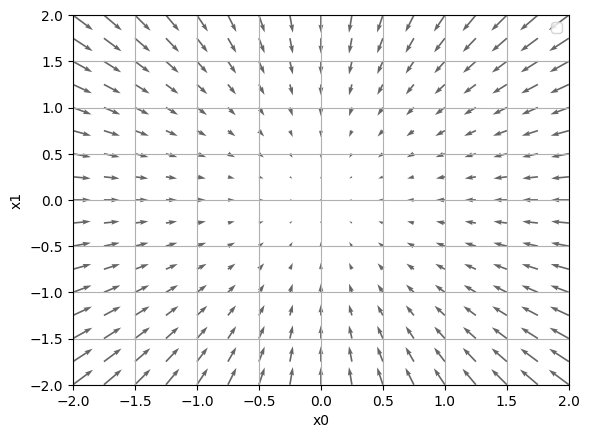

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


# 도함수(미분) 구하기
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001,  0에 가까운 값을 입력하기 위함
    grad = np.zeros_like(x) # 입력값x와 같은크기의 0값으로된 배열 생성
    # print(grad)

    for idx in range(x.size): # 입력값 x의 크기만큼 반복, 모든 x값에 대해 도함수 계산
        tmp_val = x[idx]

        # 도함수(미분) 계산
        x[idx] = float(tmp_val) + h # 양의 방향으로 0에 가까운 값 대입
        fxh1 = f(x)

        x[idx] = tmp_val - h  # 음의 방향으로 0에 가까운값 대입
        fxh2 = f(x)


        grad[idx] = (fxh1 - fxh2) / (2*h) # x변화량 / y변화량 을 연산하여 기울기 구하기
        x[idx] = tmp_val # 값 복원, 원래값 대입

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


# 제곱승
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten() # X값을 1열 만든다
Y = Y.flatten()


grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444") ,X,Y는 화살표의 출발좌표 grad[0], grad[1]는 화살표의 끝좌표
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()


아래의 수식을 기반으로 경사하강법 구현한 것이다.

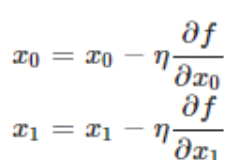

f는 최적화하려는 함수,

init_x는 초기값,

lr은 learning rate를 의미하는 학습률,

step_num은 경사법 반복 회수

numerical_gradient(f, x)로 함수의 기울기를 구한다

그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다.

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

다음은 경사하강법을 이용한 매개변수 갱신 과정을 그래프로 표현하는 코드이다.

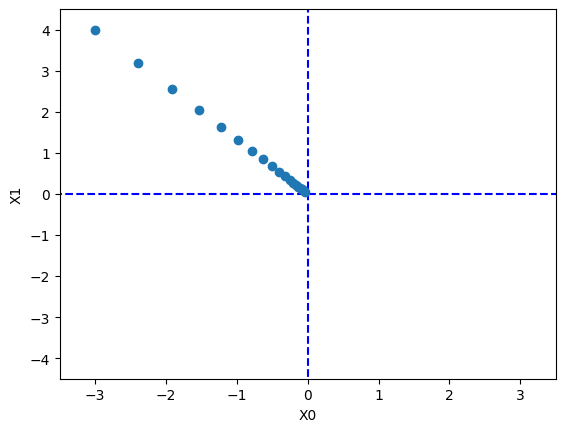

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )  # 그동안 입력값으로 사용했던 x값들을 저장

        grad = numerical_gradient(f, x) # 입력값 x에 대한 도함수 grad 계산
        x -= lr * grad # x값에 lr(학습율)*도함수값을 뺀값을 다시 x값으로 사용한다

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

간단한 신경망에 대해 기울기를 구하는 코드이다.

simpleNet 클래스는 형상이 2X3인 가중치 매개변수 하나를 인스턴스 변수로 가진다. predict(x) 메소드, loss(x,t) 메소드이고, 인수 x는 입력 데이터, t는 정답 레이블이다

In [ ]:
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

이때 simpleNet 클래스는 형상이 2X3인 가중치 매개변수 하나를 인스턴스 변수로 가진다. predict(x) 메소드, loss(x,t) 메소드이고, 인수 x는 입력 데이터, t는 정답 레이블이다.

simplNet에 몇가지 방법으로 실행해보면 아래와 같다

In [ ]:
net = simpleNet()
print(net.W) # 가중치 매개변수


x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


np.argmax(p) # 최대값의 인덱스

t = np.array([1, 0, 0]) # 정답 레이블
net.loss(x,t)


[[ 0.69382874  0.37521837 -0.24050225]
 [-2.85464651 -1.24862118 -0.76130641]]
[-2.15288461 -0.89862804 -0.82947712]


2.111597737779695

아래 코드에서 w11은 대략 -0.11, w11을 h만큼 늘리면 손실함수는 -0.11h만큼 감소하고 손실함수를 줄이려면 '양의 방향' 으로 갱신해야 한다. w23은 대략 0.06, w23을 h만큼 늘리면 손실함수는 0.06h만큼 증가하고 손실함수를 줄이려면 '음의 방향' 으로 갱신해야 한다.
다만 파이썬에서는 간단한 함수는 lambda 기법을 쓰면 더 편리한 것을 볼 수 있다.

In [ ]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)


f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)


[[-0.52737335  0.25457322  0.27280013]
 [-0.79106003  0.38185983  0.4092002 ]]
[[-0.52737335  0.25457322  0.27280013]
 [-0.79106003  0.38185983  0.4092002 ]]
